# the-miracle

Using Statsbomb data to visualise the greatest comeback in Champions League history, The Miracle of Istanbul.

1. Key Pass Maps
2. Pressure Maps
3. Goal Maps
4. xG over Time

I am very grateful for the [guide provided by Towards Data Science](https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b), which provided me with the code to draw a football pitch, and with the know-how for plotting data onto the pitch. The data used has been made available for free via [Statsbomb's API](https://github.com/statsbomb/open-data).

In [1]:
from statsbombpy import sb
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import matplotlib.patches as mpatches
from functools import reduce

In [2]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [3]:
def pass_map(events_df, chart_title):

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    draw_pitch(ax)
    plt.axis('off')
    
    for i in range(len(events_df)):
        color = "red" if events_df.iloc[i]["possession_team"] == "Liverpool" else "black"

        
        ax.annotate("", xy = (events_df.iloc[i]['pass_end_location'][0], events_df.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                xytext = (events_df.iloc[i]['location'][0], events_df.iloc[i]['location'][1]), textcoords = 'data', 
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = color),)
    plt.title(chart_title)
   
    #manually add legend - code from https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
    handles, labels = ax.get_legend_handles_labels()
    # manually define a new patch 
    patch = mpatches.Patch(color='black', label='AC Milan')
    # handles is a list, so append manual patch
    handles.append(patch) 
    # manually define a new patch 
    patch = mpatches.Patch(color='red', label='Liverpool')
    # handles is a list, so append manual patch
    handles.append(patch)     
    # plot the legend
    plt.legend(handles=handles, loc='upper left')
    plt.savefig('pass.svg')
    plt.show()

In [4]:
def goal_map(pass_df, shot_df, carry_df, chart_title):

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    draw_pitch(ax)
    plt.axis('off')
    
    for i in range(len(pass_df)):
        color = "#39FF14"

        
        ax.annotate("", xy = (pass_df.iloc[i]['pass_end_location'][0], pass_df.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                xytext = (pass_df.iloc[i]['location'][0], pass_df.iloc[i]['location'][1]), textcoords = 'data', 
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = color,label="pass"),)
    
        
    for i in range(len(shot_df)):
        color = "cyan"

        
        ax.annotate("", xy = (shot_df.iloc[i]['shot_end_location'][0], shot_df.iloc[i]['shot_end_location'][1]), xycoords = 'data',
                xytext = (shot_df.iloc[i]['location'][0], shot_df.iloc[i]['location'][1]), textcoords = 'data', 
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = color,label="shot"),)
    
    for i in range(len(carry_df)):
        color = "magenta"

        
        ax.annotate("", xy = (carry_df.iloc[i]['carry_end_location'][0], carry_df.iloc[i]['carry_end_location'][1]), xycoords = 'data',
                xytext = (carry_df.iloc[i]['location'][0], carry_df.iloc[i]['location'][1]), textcoords = 'data', 
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = color,label="carry"),)

    #manually add legend - code from https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
    handles, labels = ax.get_legend_handles_labels()
    # manually define a new patch 
    patch = mpatches.Patch(color='cyan', label='Shot')
    # handles is a list, so append manual patch
    handles.append(patch) 
    # manually define a new patch 
    patch = mpatches.Patch(color='#39FF14', label='Pass')
    # handles is a list, so append manual patch
    handles.append(patch)     
    # manually define a new patch 
    patch = mpatches.Patch(color='magenta', label='Carry')
    # handles is a list, so append manual patch
    handles.append(patch) 
    # plot the legend
    plt.legend(handles=handles, loc='upper left')
    plt.title(chart_title)
    plt.savefig('goal.svg')
    plt.show()

In [5]:
def pressure_map(miracle_df, half, chart_title):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    #ac pressures
    ac_press_df = miracle_df[(miracle_df.possession_team =='AC Milan') & (miracle_df.type == "Pressure") & (miracle_df.period == half)]
    x_ac = [location[0] for i, location in enumerate(ac_press_df["location"])]
    y_ac = [location[1] for i, location in enumerate(ac_press_df["location"])]
    ax.scatter(x_ac, y_ac, c = 'black', label = 'AC Milan')
    #liverpool pressures
    liv_press_df = miracle_df[(miracle_df.possession_team =='Liverpool') & (miracle_df.type == "Pressure") & (miracle_df.period == half)]
    x_liv = [location[0] for i, location in enumerate(liv_press_df["location"])]
    y_liv = [location[1] for i, location in enumerate(liv_press_df["location"])]
    ax.scatter(x_liv, y_liv, c = 'red', label = 'Liverpool')
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.legend(loc='lower right')
    plt.axis('off')
    plt.title(chart_title)
    plt.savefig('pressure.svg')
    plt.show()

In [6]:
def goal_map_data(miracle_df, sequence_no, chart_title):
    goal = miracle_df[(miracle_df.possession == sequence_no)]
    goal_pass = goal[(goal.type == "Pass")]
    goal_shot = goal[(goal.type == "Shot")]
    goal_carry = goal[(goal.type == "Carry")]
    goal_type = goal["type"].tolist()
    print(goal_type)
    goal_player = goal["player"].tolist()
    print(goal_player)
    goal_map(goal_pass, goal_shot, goal_carry, chart_title)

In [7]:
#Get match event data
miracle_df = sb.events(match_id=2302764)

credentials were not supplied. open data access only


## 1. Key Pass Maps

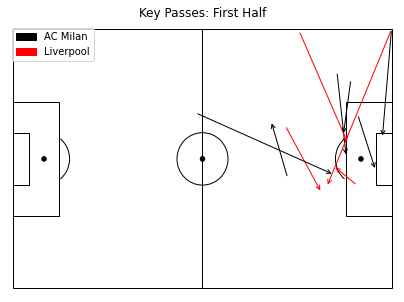

In [21]:
miracle_df_shots = miracle_df[(miracle_df.type == "Shot")]
key_passes = miracle_df_shots["shot_key_pass_id"].tolist()
#print(key_passes)
miracle_df_pass1 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 1)]
miracle_df_keypass1 = miracle_df_pass1[miracle_df_pass1['id'].isin(key_passes)]
#print(miracle_df_keypass1)
miracle_df_pass2 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 2)]
miracle_df_keypass2 = miracle_df_pass2[miracle_df_pass2['id'].isin(key_passes)]
pass_map(miracle_df_keypass1, "Key Passes: First Half")

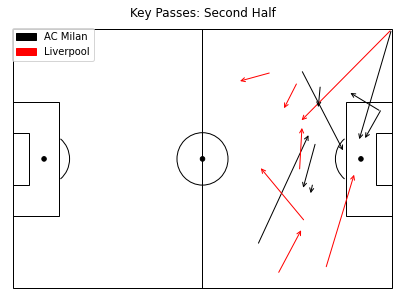

In [20]:
pass_map(miracle_df_keypass2, "Key Passes: Second Half")

## 2. Pressure Maps

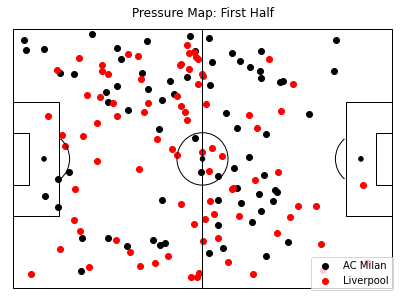

In [23]:
pressure_map(miracle_df, 1, "Pressure Map: First Half")

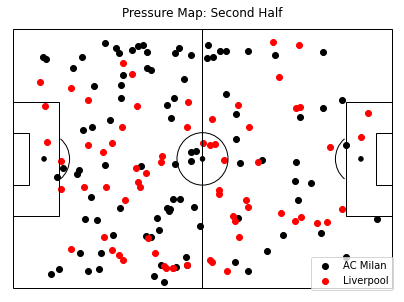

In [22]:
pressure_map(miracle_df, 2, "Pressure Map: Second Half")

## 3. Goal Maps

In [10]:
#miracle_match = sb.matches(competition_id=16, season_id=37)
miracle_df = sb.events(match_id=2302764)
miracle_df_goals = miracle_df[(miracle_df.type == "Shot") & (miracle_df.shot_outcome == "Goal")]
assists = miracle_df_goals["shot_key_pass_id"].tolist()
#print(key_passes)
#miracle_df_pass1 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 1)]
miracle_df_assists1 = miracle_df_pass1[miracle_df_pass1['id'].isin(assists)]
#print(miracle_df_keypass1)
#miracle_df_pass2 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 2)]
miracle_df_assists2 = miracle_df_pass2[miracle_df_pass2['id'].isin(assists)]

credentials were not supplied. open data access only


In [11]:
#list of goal ending sequences
miracle_df_goals = miracle_df[(miracle_df.shot_outcome == "Goal")]
goal_list = miracle_df_goals["possession"].tolist()
print(goal_list)

[4, 90, 103, 129, 136, 145, 296, 298, 299, 301, 302]


['Pass', 'Ball Receipt*', 'Shot', 'Goal Keeper']
['Andrea Pirlo', 'Paolo Maldini', 'Paolo Maldini', 'Jerzy Dudek']


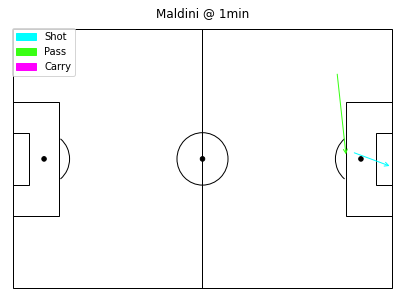

<Figure size 432x288 with 0 Axes>

In [12]:
goal_map_data(miracle_df, 4, "Maldini @ 1min")

['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Carry', 'Carry', 'Carry', 'Pressure', 'Duel', 'Shot', 'Goal Keeper', 'Ball Recovery']
['Paolo Maldini', 'Clarence Seedorf', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite', 'Andriy Shevchenko', 'Clarence Seedorf', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite', 'Andriy Shevchenko', 'Hernán Jorge Crespo', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite', 'Andriy Shevchenko', 'Luis Javier García Sanz', 'Alessandro Nesta', 'Hernán Jorge Crespo', 'Jerzy Dudek', 'Paolo Maldini']


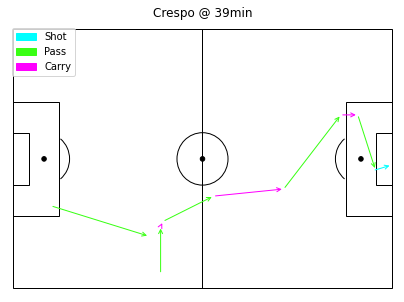

<Figure size 432x288 with 0 Axes>

In [13]:
goal_map_data(miracle_df, 90, "Crespo @ 39min")

['Pass', 'Pass', 'Pass', 'Pass', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Carry', 'Carry', 'Carry', 'Carry', 'Pressure', 'Shot', 'Goal Keeper', 'Dribble', 'Dribbled Past']
['Andrea Pirlo', 'Marcos Evangelista de Moraes', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite', 'Marcos Evangelista de Moraes', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite', 'Hernán Jorge Crespo', 'Marcos Evangelista de Moraes', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite', 'Ricardo Izecson dos Santos Leite', 'Xabier Alonso Olano', 'Hernán Jorge Crespo', 'Jerzy Dudek', 'Ricardo Izecson dos Santos Leite', 'Xabier Alonso Olano']


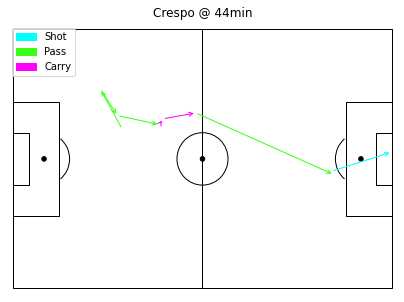

<Figure size 432x288 with 0 Axes>

In [14]:
goal_map_data(miracle_df, 103, "Crespo @ 44min")

['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Carry', 'Carry', 'Carry', 'Carry', 'Carry', 'Carry', 'Carry', 'Carry', 'Pressure', 'Pressure', 'Shot', 'Goal Keeper', 'Block', 'Ball Recovery']
['John Arne Semundseth Riise', 'Steven Gerrard', 'John Arne Semundseth Riise', 'Steven Gerrard', 'Xabier Alonso Olano', 'Dietmar Hamann', 'Xabier Alonso Olano', 'John Arne Semundseth Riise', 'John Arne Semundseth Riise', 'Steven Gerrard', 'John Arne Semundseth Riise', 'Steven Gerrard', 'Xabier Alonso Olano', 'Dietmar Hamann', 'Xabier Alonso Olano', 'John Arne Semundseth Riise', 'Steven Gerrard', 'Steven Gerrard', 'John Arne Semundseth Riise', 'Steven Gerrard', 'Xabier Alonso Olano', 'Dietmar Hamann', 'Xabier Alonso Olano', 'John Arne Semundseth Riise', 'John Arne Semundseth Riise', 'Andriy Shevchenko', 'Ivan Gennaro Gattuso', 'Steven Gerr

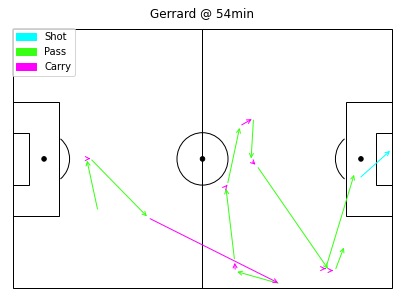

<Figure size 432x288 with 0 Axes>

In [15]:
goal_map_data(miracle_df, 129, "Gerrard @ 54min")

['Pass', 'Pass', 'Pass', 'Ball Receipt*', 'Ball Receipt*', 'Ball Receipt*', 'Carry', 'Carry', 'Pressure', 'Shot', 'Goal Keeper']
['John Arne Semundseth Riise', 'Xabier Alonso Olano', 'Dietmar Hamann', 'Xabier Alonso Olano', 'Dietmar Hamann', 'Vladimir Smicer', 'Dietmar Hamann', 'Vladimir Smicer', 'Clarence Seedorf', 'Vladimir Smicer', 'Nelson de Jesus da Silva']


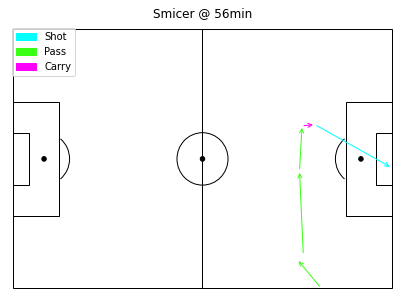

<Figure size 432x288 with 0 Axes>

In [16]:
goal_map_data(miracle_df, 136, "Smicer @ 56min")

['Pressure', 'Shot', 'Shot', 'Goal Keeper', 'Goal Keeper', 'Ball Recovery']
['Alessandro Nesta', 'Xabier Alonso Olano', 'Xabier Alonso Olano', 'Nelson de Jesus da Silva', 'Nelson de Jesus da Silva', 'Xabier Alonso Olano']


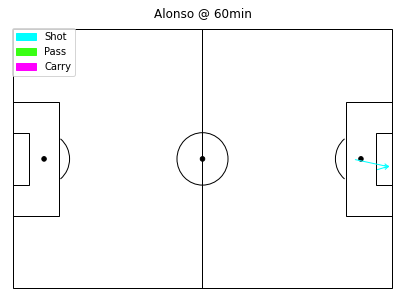

<Figure size 432x288 with 0 Axes>

In [17]:
goal_map_data(miracle_df, 145, "Alonso @ 60min")

## 4. xG Over Time

<ipython-input-18-95adf98da938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xg_lfc_df['cum_xg'] = xg_lfc_df['shot_statsbomb_xg'].cumsum()
<ipython-input-18-95adf98da938>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xg_ac_df['cum_xg'] = xg_ac_df['shot_statsbomb_xg'].cumsum()


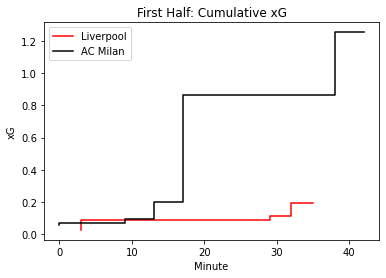

In [18]:
xg_lfc_df = miracle_df[(miracle_df.possession_team == "Liverpool") & (miracle_df.period == 1) & (miracle_df.type == "Shot")]
xg_lfc_df['cum_xg'] = xg_lfc_df['shot_statsbomb_xg'].cumsum()
xg_ac_df = miracle_df[(miracle_df.possession_team == "AC Milan") & (miracle_df.period == 1) & (miracle_df.type == "Shot")]
xg_ac_df['cum_xg'] = xg_ac_df['shot_statsbomb_xg'].cumsum()
plt.plot(xg_lfc_df.minute, xg_lfc_df.cum_xg, color = "Red", drawstyle='steps', label = "Liverpool")
plt.plot(xg_ac_df.minute, xg_ac_df.cum_xg, color = "Black", drawstyle='steps', label = "AC Milan")
plt.xlabel('Minute')
plt.ylabel('xG')
plt.title('First Half: Cumulative xG')
plt.legend()
plt.savefig('xg1.svg')
plt.show()

<ipython-input-19-738ef3a68b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xg_lfc_df['cum_xg'] = xg_lfc_df['shot_statsbomb_xg'].cumsum()
<ipython-input-19-738ef3a68b88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xg_ac_df['cum_xg'] = xg_ac_df['shot_statsbomb_xg'].cumsum()


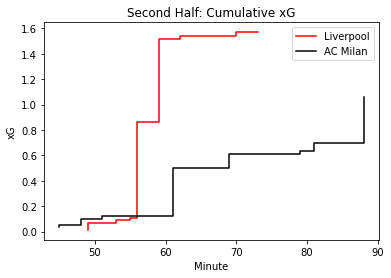

In [19]:
xg_lfc_df = miracle_df[(miracle_df.possession_team == "Liverpool") & (miracle_df.period == 2) & (miracle_df.type == "Shot")]
xg_lfc_df['cum_xg'] = xg_lfc_df['shot_statsbomb_xg'].cumsum()
xg_ac_df = miracle_df[(miracle_df.possession_team == "AC Milan") & (miracle_df.period == 2) & (miracle_df.type == "Shot")]
xg_ac_df['cum_xg'] = xg_ac_df['shot_statsbomb_xg'].cumsum()
plt.plot(xg_lfc_df.minute, xg_lfc_df.cum_xg, drawstyle='steps', color = "Red", label = "Liverpool")
plt.plot(xg_ac_df.minute, xg_ac_df.cum_xg, drawstyle='steps', color = "Black", label = "AC Milan")
plt.xlabel('Minute')
plt.ylabel('xG')
plt.title('Second Half: Cumulative xG')
plt.legend()
plt.savefig('xg2.svg')
plt.show()